In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from tqdm import tqdm

In [3]:
# d3n  = np.loadtxt(r"\\wsl.localhost\Ubuntu-20.04\home\mengzhu\lzy\smash-master\build\data\4\particle_lists.oscar")
# d3f  = np.loadtxt(r"\\wsl.localhost\Ubuntu-20.04\home\mengzhu\lzy\smash-master\build\data\0\particle_lists.oscar")
# d5n  = np.loadtxt(r"\\wsl.localhost\Ubuntu-20.04\home\mengzhu\lzy\smash-master\build\data\5\particle_lists.oscar")
# d5f  = np.loadtxt(r"\\wsl.localhost\Ubuntu-20.04\home\mengzhu\lzy\smash-master\build\data\1\particle_lists.oscar")
# d10n  = np.loadtxt(r"\\wsl.localhost\Ubuntu-20.04\home\mengzhu\lzy\smash-master\build\data\6\particle_lists.oscar")
# d10f  = np.loadtxt(r"\\wsl.localhost\Ubuntu-20.04\home\mengzhu\lzy\smash-master\build\data\2\particle_lists.oscar")
# d20n  = np.loadtxt(r"\\wsl.localhost\Ubuntu-20.04\home\mengzhu\lzy\smash-master\build\data\7\particle_lists.oscar")
# d20f  = np.loadtxt(r"\\wsl.localhost\Ubuntu-20.04\home\mengzhu\lzy\smash-master\build\data\3\particle_lists.oscar")

In [14]:
d3n.shape

(5837691, 12)

In [ ]:
d

In [16]:
def rapity(pdg_id=2212,data=d20n.copy()):
    pdg = data[:,9]
    ndn=0
    ylist=[]
    npart = pdg.shape[0]
#     p0= data[:,5] 
    px = data[:,6]
    py= data[:,7] 
    pz = data[:,8]
    mass=data[:,4]
    for i in range(npart):
        if pdg[i] == pdg_id and px[i] != 0 and py[i] != 0:
            m = mass[i]
            ecm = np.sqrt(px[i] * px[i] + py[i] * py[i] + pz[i] * pz[i] + m * m)
            ycm = 0.5 * np.log((ecm + pz[i]) / (ecm - pz[i]))
            ndn += 1
#             ycm = 0.5 * np.log((p0[i] + pz[i]) / (p0[i] - pz[i]))
            ylist.append(ycm)
                          
    return ylist

In [17]:
def rapity(pdg_id=1000,data=d3n.copy()):
    pdg = data[:,9]
    ndn=0
    ylist=[]
    npart = pdg.shape[0]
#     p0= data[:,5] 
    px = data[:,6]
    py= data[:,7] 
    pz = data[:,8]
    mass=data[:,4]
    for i in range(npart):
        if len(str(pdg[i]) == pdg_id and px[i] != 0 and py[i] != 0:
            m = mass[i]
            ecm = np.sqrt(px[i] * px[i] + py[i] * py[i] + pz[i] * pz[i] + m * m)
            ycm = 0.5 * np.log((ecm + pz[i]) / (ecm - pz[i]))
            ndn += 1
#             ycm = 0.5 * np.log((p0[i] + pz[i]) / (p0[i] - pz[i]))
            ylist.append(ycm)
                          
    return ylist

SyntaxError: invalid syntax (3676338665.py, line 12)

In [16]:
def pt(pdg_id=2212,data=d3n.copy()):
    pdg = data[:,9]
    ptlist=[]
    etalist=[]
    ndn=0
    npart = pdg.shape[0]
    px = data[:,6]
    py= data[:,7] 
    pz = data[:,8]
    for j in range(npart):
        if pdg[j] == pdg_id and px[j] != 0 and py[j] != 0:
            ndn += 1
            
            pt = np.sqrt(px[j] * px[j] + py[j] * py[j])
            pcm = np.sqrt(pt * pt + pz[j] * pz[j])
            eta = 0.5 * np.log((pcm + pz[j]) / (pcm - pz[j]))
            ptlist.append(pt)
            etalist.append(eta)
    return ptlist

In [17]:
def eta(pdg_id=2212,data=d3n.copy(),bins=500):
    pdg = data[:,9]
    ptlist=[]
    etalist=[]
    ndn=0
    npart = pdg.shape[0]
    px = data[:,6]
    py= data[:,7] 
    pz = data[:,8]
    for j in range(npart):
        if pdg[j] == pdg_id and px[j] != 0 and py[j] != 0:
            ndn += 1
            
            pt = np.sqrt(px[j] * px[j] + py[j] * py[j])
            pcm = np.sqrt(pt * pt + pz[j] * pz[j])
            eta = 0.5 * np.log((pcm + pz[j]) / (pcm - pz[j]))
            ptlist.append(pt)
            etalist.append(eta)
    y_eta=np.array(etalist)
    _=plt.hist(y_eta,bins,color="red")        

In [29]:
# def plot_rapity(data=d3n,pdg_id=2212,bins=500):
#     y_rapity=np.array(rapity(pdg_id,data))
#     _=plt.hist(y_rapity,bins)

In [ ]:
def plot_rapity(data1=d20n,data2=d20f,pdg_id=2212,bins=500):
    y_rapity1=np.array(rapity(pdg_id,data1))
    y_rapity2=np.array(rapity(pdg_id,data2))
    hist1, bins = np.histogram(y_rapity1,bins=bins)
    hist2, bins = np.histogram(y_rapity2,bins=bins)
    onehist1=hist1/5000
    onehist2=hist2/5000
    plt.plot(bins[:-1], onehist1, color='green',label='string on')
    plt.plot(bins[:-1], onehist2, color='red',label='string off')
    plt.xlabel('y')
    plt.ylabel('dn/dy')
    plt.legend()
    plt.show()
# # 显示标题
# plt.title('Histogram')

In [19]:
def plot_pt(data1=d3n,data2=d3f,pdg_id=4,bins=500):
    y_pt1=np.array(pt(pdg_id,data1))
    y_pt2=np.array(pt(pdg_id,data2))
    hist1, bins = np.histogram(y_pt1,bins=bins)
    hist2, bins = np.histogram(y_pt2,bins=bins)
    onehist1=hist1/5000
    onehist2=hist2/5000
    plt.plot(bins[:-1], onehist1, color='blue',label='string on')
    plt.plot(bins[:-1], onehist2, color='red',label='string off')
    plt.xlabel('pt')
    plt.ylabel('dn')
    plt.legend()
    plt.show()

In [20]:
# def plot_pt(data=d3n,pdg_id=2212,bins=500):
#     y_pt=np.array(pt(pdg_id,data))
#     _=plt.hist(y_pt,bins,color="green")

## 快度分布

### 3GeV

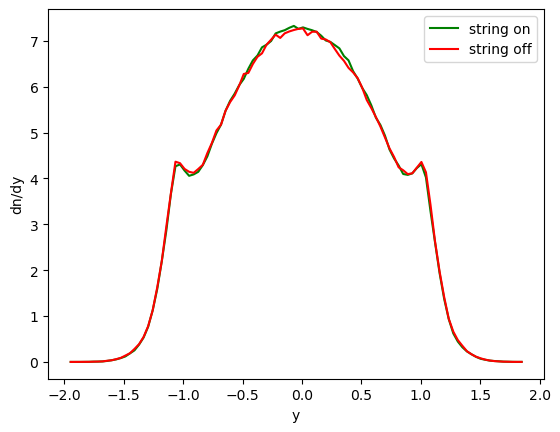

In [20]:
plot_rapity(d3n,d3f,2212,100)

### 5GeV

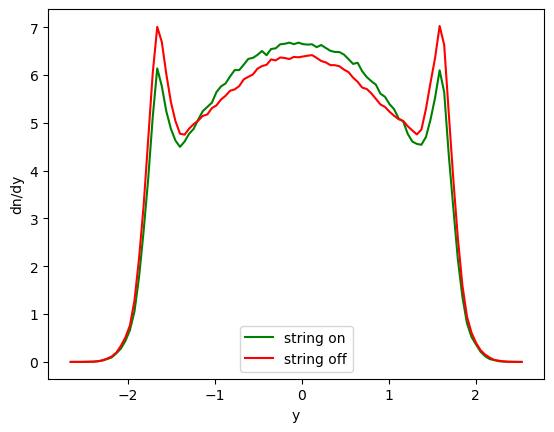

In [21]:
plot_rapity(d5n,d5f,2112,100)

### 10GeV

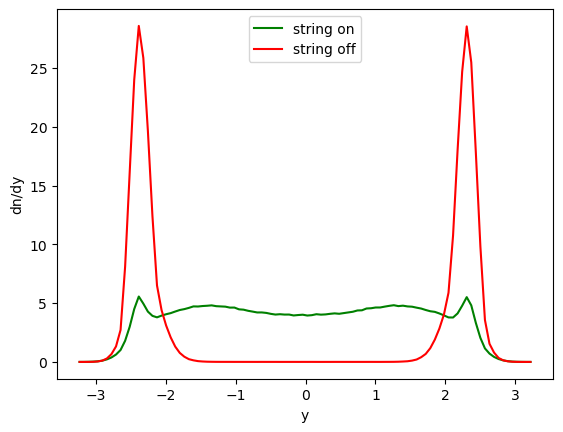

In [22]:
plot_rapity(d10n,d10f,2112,100)

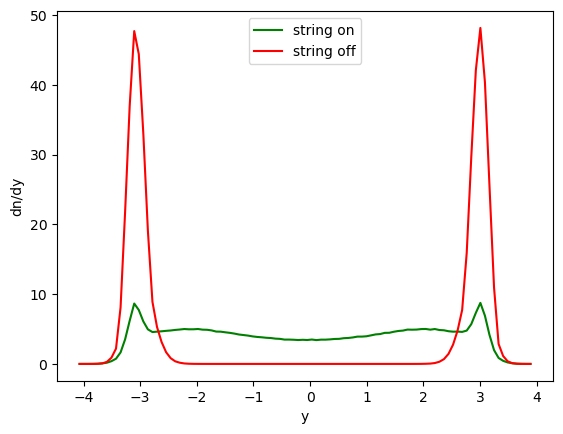

In [11]:
plot_rapity(d20n,d20f,2112,100)

## pt谱

### 3GeV

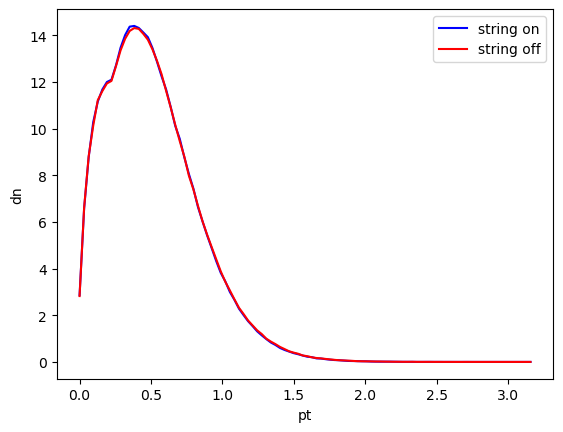

In [23]:
plot_pt(d3n,d3f,2212,100)

### 5GeV

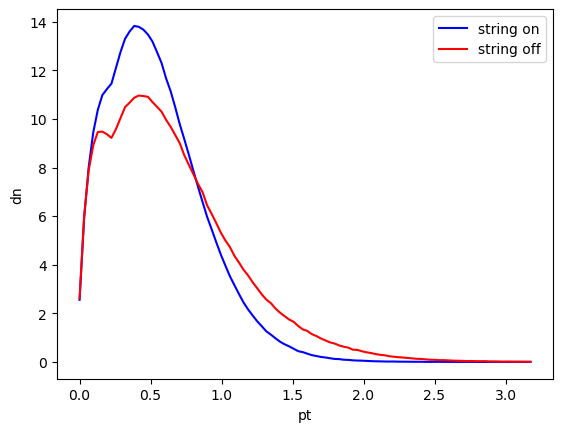

In [24]:
plot_pt(d5n,d5f,2212,100)

### 10GeV

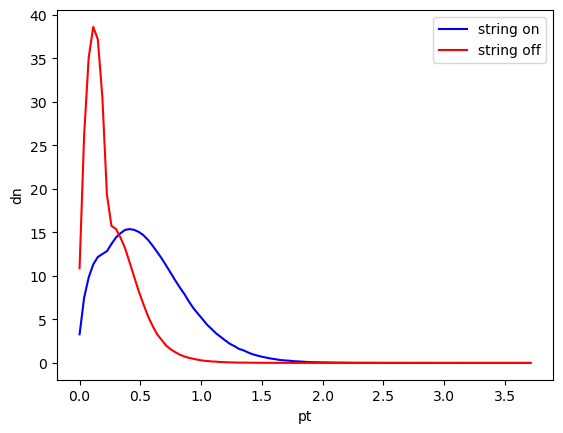

In [25]:
plot_pt(d10n,d10f,2212,100)

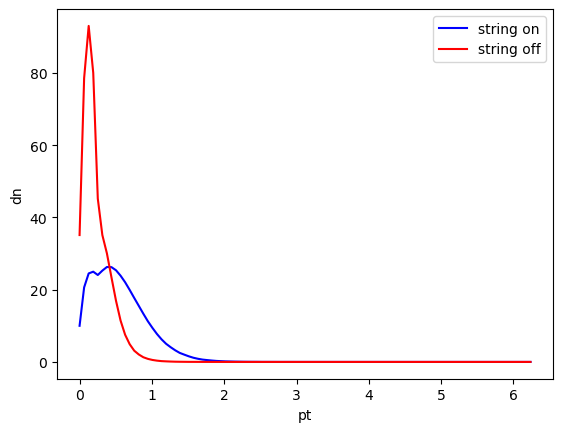

In [37]:
plot_pt(d20n,d20f,2112,100)

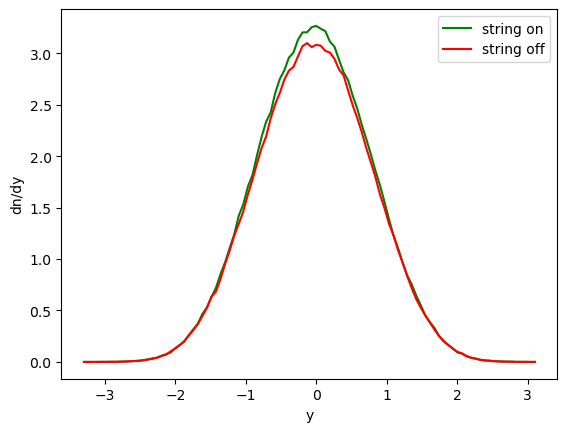

In [25]:
plot_rapity(d3n,d3f,211,100)

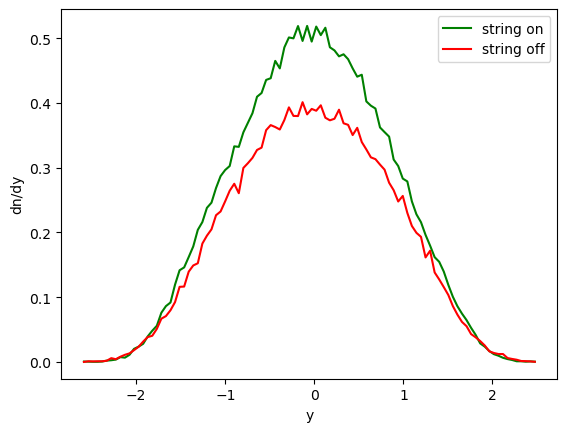

In [28]:
plot_rapity(d5n,d5f,221,100)

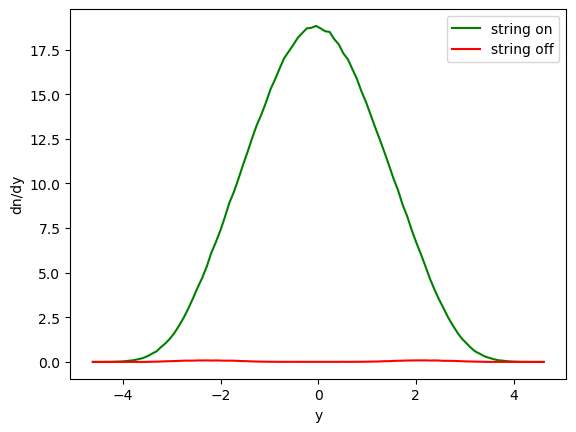

In [27]:
plot_rapity(d10n,d10f,111,100)

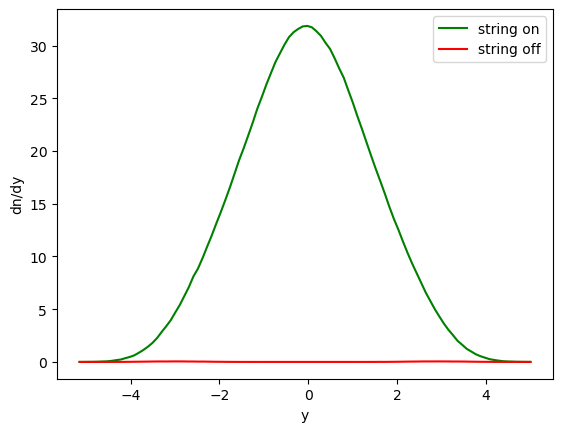

In [26]:
plot_rapity(d20n,d20f,211,100)